# <font color= Green> Credit card Fraud detection

In this project, I worked on credit card fraud detection problem dealing with imbalanced data. The dataset for this project was obtained from [kaggle.com](https://www.kaggle.com/mlg-ulb/creditcardfraud). 

## <font color =blue>Description of the dataset:

The dataset contains credit card transactions made in september 2013 by European holders. The dataset is said to be imbalanced because out of 284,807 transactions only 492 are fraudulent and remaining transactions are Non fraudulent.
Overall it has 30 features and all of them are numeric. The features **V1,V2,V3....V28**, inorder to protect the confidentiality, the names and critical information about these features are not revealed. The **Time** features tells the time when the transaction took place. The amount feature reveals the **Amount** information of each transaction and the target variable **Class**, where 1 represents it is fraud and 0 otherwise. 


## <font color=blue>Outline of the project

1) **Understanding the data**
   * Knowing the more details about the dataset
    
2) **Preprocessing**
   * Normalising the data
   * Removing the Outliers present in the data
   * Spliting the data into train and test data 
    
3) **Handling imbalanced data**
   * Undersampling
   * Oversampling
   * Smote techniques
   * Dimensionality Reduction
   
4) **Testing the Data using Machine Learning Algorithms**
   * Logistic Regression
   * Random Forest
   * KNN
   * Hyperparameter tunning
   
    

### Importing libraries


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import time

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA,TruncatedSVD



from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score,classification_report
from collections import Counter


## Loading the dataset

In [5]:
df=pd.read_csv("creditcard.csv")

## <font color=blue> Understanding the data
    

In [6]:
df.shape

(284807, 31)

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Are there any missing variables in the dataset?**

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**How many number of fraud cases present in the dataset?**

In [11]:
df.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

**Let's visualize the above cell using barplot**

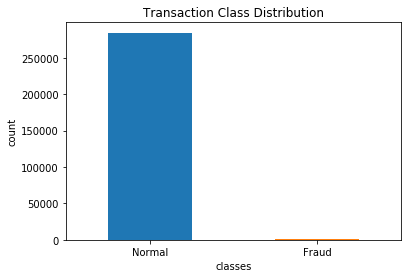

In [12]:
Labels=["Normal","Fraud"]
count_classes=df.Class.value_counts()
count_classes.plot(kind='bar',rot=0);
plt.title("Transaction Class Distribution")
plt.xlabel("classes")
plt.ylabel("count")
plt.xticks(range(2),Labels);

## Observations

* The dataset contains 30 features and except Time, Amount features all other features are standardized.
* It only contains 0.172% of fraud transactions, which results in highly imbalanced and skewed data towards Normal Transactions
* It doesn't contain any missing variables in the dataset.
* The dataset claims that V features went through PCA transformation, In order to do PCA transformation the values needs to be scaled.Hence V features values are scaled except Time and Amount variables in the dataset.




## <font color =red>Note: 
    
when we use this data as such for building models, it will throw so many errors and may end up with overfitting problem. The model assumes that most of the transactions are predicted as Normal, in few actual cases they are Fraud Transactions.But what we want from our model is to find patterns of fraud transactions.


## <font color=blue>Preprocessing the data

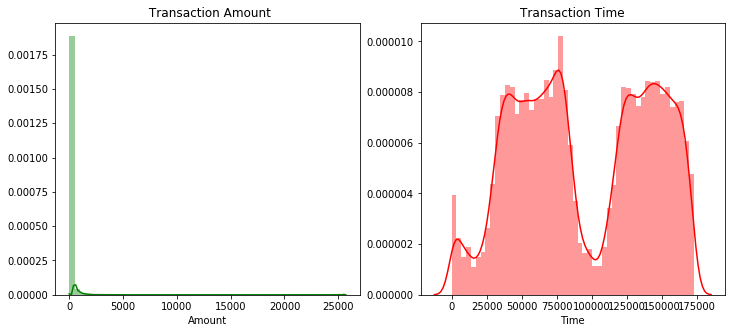

In [13]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.distplot(df.Amount,ax=ax[0],color='g');
ax[0].set_title(" Transaction Amount");

sns.distplot(df.Time,ax=ax[1],color='r');
ax[1].set_title("Transaction Time");

From the above plots we can observe that how skewed the distribution of these two features are. In order to overcome this distribution problem we need to standardize the data.


In [14]:
sc=StandardScaler()
df['amount']=sc.fit_transform(df[["Amount"]])
df['time']=sc.fit_transform(df[["Time"]])
df.drop(['Time','Amount'],axis=1,inplace=True)

In [15]:
df.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount,time
13637,1.189648,0.142604,-0.047900,1.022025,0.703172,1.147797,-0.210647,0.185894,1.393414,-0.300663,...,-0.796104,-0.187757,-1.798686,0.612810,-0.418917,0.004890,-0.007002,0,-0.210098,-1.487592
31919,1.314590,0.595634,-0.665161,0.715895,0.308127,-1.123828,0.393555,-0.292304,-0.142569,-0.599762,...,-0.424013,-0.142168,-0.198308,0.641823,0.399245,-0.033871,0.031840,0,-0.350191,-1.226642
281766,-0.360602,0.672679,0.816777,-2.356003,0.603731,-1.321360,1.514610,-0.585614,0.486188,-1.513348,...,-0.217953,-0.549498,-0.071779,0.843905,-0.129327,-0.151158,-0.183328,0,-0.336278,1.591835
978,-1.460494,1.072256,1.525621,0.122964,-0.874790,-0.382503,0.025338,0.353055,0.923318,0.274842,...,0.534206,-0.218095,0.429192,-0.068667,0.428325,0.159005,0.040868,0,-0.233327,-1.980979
269789,0.998945,-2.404042,-1.659902,0.678589,-0.506452,0.970804,0.042013,-0.055707,-0.703185,0.867010,...,-0.625744,-0.372594,-0.363030,-0.210669,-0.724453,-0.044585,0.059849,0,2.006041,1.452199


In [16]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount,time
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727,3.202236e-16,-1.050379e-14
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,1.000002e+00,1.000002e+00
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-3.532294e-01,-1.996583e+00
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-3.308401e-01,-8.552120e-01
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,-2.652715e-01,-2.131453e-01
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,-4.471707e-02,9.372174e-01
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,1.023622e+02,1.642058e+00


### <font color =red> Note:

* When we have imbalanced data, first we need to split the data into Train and Test set. Later on, we should apply undersampling and oversampling techniques to only Train dataset. The Test dataset should keep as such as original data. 

* Sklearn has beautiful package called Stratified Sampling, that divides the dataset into equal proportion of classes. While doing train/test split we have to use Stratified Sampling technique.

* When dealing with imbalanced data, selection of evaluation metrics also plays a important role. Accuracy is not the correct metric for imbalanced data. There are other metrics to consider such as AUC, Precision and Recall.

For more information about this please go through [datascience stack exchange](https://datascience.stackexchange.com/questions/32818/train-test-split-of-unbalanced-dataset-classification)

## Spliting the dataset

In [19]:
X=df.drop(['Class'],axis=1)
Y=df['Class']

In [20]:
ss=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in ss.split(X,Y):
    X_train,Y_train=X.iloc[train_index],Y.iloc[train_index]
    X_test,Y_test=X.iloc[test_index],Y.iloc[test_index]

# ensuring the stratifiedKFold split the data equally
X_train=X_train.values
Y_train=Y_train.values
X_test=X_test.values
Y_test=Y_test.values

Y_train_labels,Y_train_count=np.unique(Y_train,return_counts=True)
Y_test_labels,Y_test_count=np.unique(Y_test,return_counts=True)


print("Label Distributions: \n")

print((Y_train_count)/len(Y_train))
print((Y_test_count)/len(Y_test))


Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [62]:
X_test.shape

(56961, 30)

## <font color=blue> Handling imbalanced data

There are several different ways to handle imbalanced data. Few of them are 
 * Undersampling
 * Oversampling
 * SMOTE technique
 
Each method has it's own advantages and disadvantages. For more detail please go through the [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2016/03/practical-guide-deal-imbalanced-classification-problems/)

## Undersampling

This method reduces the number of observations from the majority class to make the dataset balanced.

### <font color=red> NOTE:
This method is not practically useful as it reduces so much of important information from the observations of majority class
    

## <font color=red>Note:

While doing undersampling or oversampling technique we need to do during cross validation, not before otherwise the model is going to overfit the data. There is a good article explained on this please go thorugh this for more information.
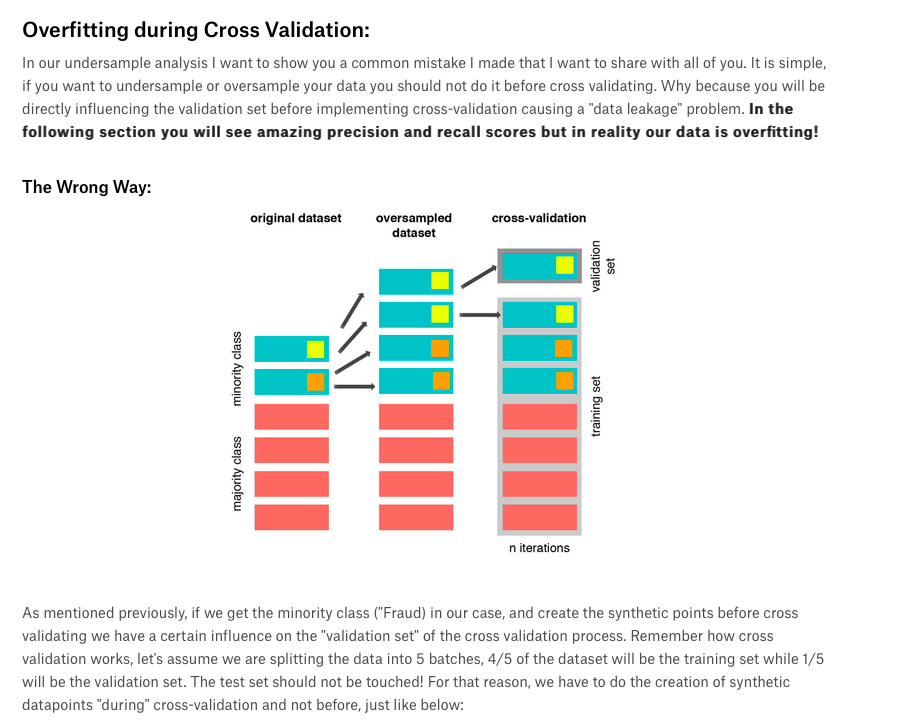


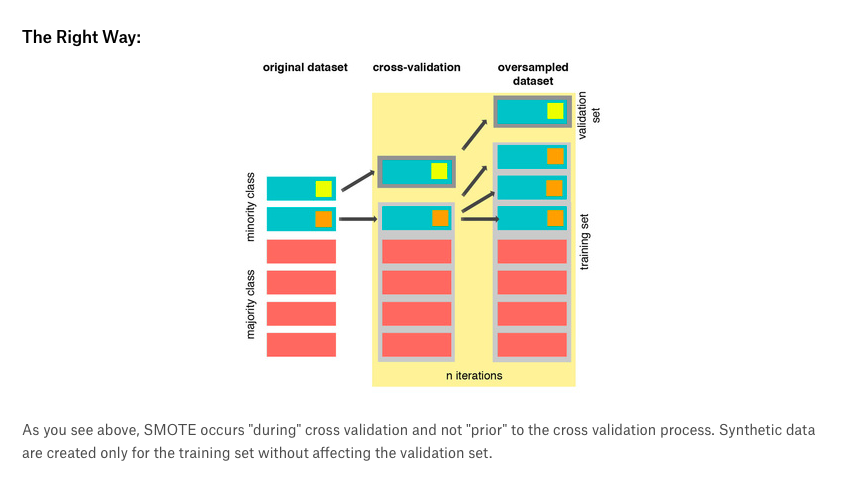

## Grid search cv for finding best parameters for the model

In [21]:
# Finding the best parameters for the model using GRid search cv

# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, Y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_



## Undersampling during cross validation - NearMiss technique

In [51]:
accuracy_near=[]
precision_near=[]
recall_near=[]
f1_near=[]
auc_near=[]


for train,test in ss.split(X_train,Y_train):
    near_pipeline=imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'),log_reg)
    near_model=near_pipeline.fit(X_train[train],Y_train[train])
    near_prediction=near_pipeline.predict(X_train[test])
    accuracy_near.append(near_pipeline.score(X_train[test],Y_train[test]))
    precision_near.append(precision_score(Y_train[test],near_prediction))
    recall_near.append(recall_score(Y_train[test],near_prediction))
    f1_near.append(f1_score(Y_train[test],near_prediction))
    auc_near.append(roc_auc_score(Y_train[test],near_prediction))

In [52]:
print('')
print("accuracy: {}".format(np.mean(accuracy_near)))
print("precision: {}".format(np.mean(precision_near)))
print("recall: {}".format(np.mean(recall_near)))
print("f1: {}".format(np.mean(f1_near)))




accuracy: 0.6434033878375789
precision: 0.0044113148165506
recall: 0.9037000973709833
f1: 0.008779280536783136


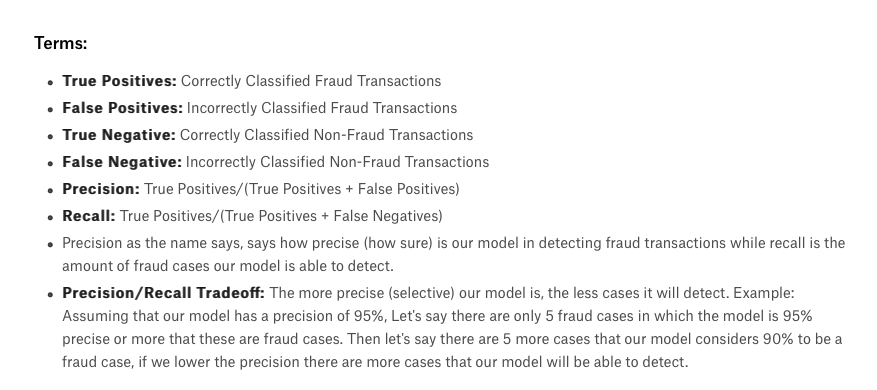

In [53]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Recall metric in the testing dataset:  0.8979591836734694


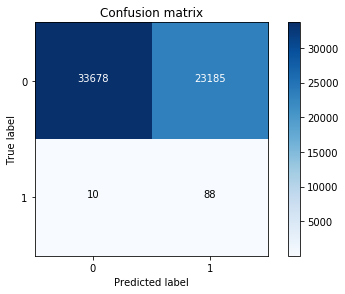

In [54]:
cnf_matrix1 = confusion_matrix(Y_test,near_model.predict(X_test))
print("Recall metric in the testing dataset: ", cnf_matrix1[1,1]/(cnf_matrix1[1,0]+cnf_matrix1[1,1]))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix1, classes=class_names, title='Confusion matrix')

# Sampling using Smote Technique

Smote is synthetic minority Oversampling technique. It creates synthetic points in order to have equal balances of classes.


In [40]:
accuracy_smote=[]
precision_smote=[]
recall_smote=[]
f1_smote=[]
auc_smote=[]



for train,test in ss.split(X_train,Y_train):
    smote_pipeline=imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'),log_reg)
    smote_model=smote_pipeline.fit(X_train[train],Y_train[train])
    smote_prediction=smote_model.predict(X_train[test])
    accuracy_smote.append(smote_pipeline.score(X_train[test],Y_train[test]))
    precision_smote.append(precision_score(Y_train[test],smote_prediction))
    recall_smote.append(recall_score(Y_train[test],smote_prediction))
    f1_smote.append(f1_score(Y_train[test],smote_prediction))
    auc_smote.append(roc_auc_score(Y_train[test],smote_prediction))

In [41]:
print("accuracy: {}".format(np.mean(accuracy_smote)))
print("precision: {}".format(np.mean(precision_smote)))
print("recall: {}".format(np.mean(recall_smote)))
print("f1: {}".format(np.mean(f1_smote)))

accuracy: 0.9772082738539826
precision: 0.06509593013475258
recall: 0.9087309315157416
f1: 0.12146291012277452


In [42]:
labels = ['No Fraud', 'Fraud']
smote_prediction = smote_model.predict(X_test)
print(classification_report(Y_test, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.99     56863
       Fraud       0.06      0.93      0.11        98

   micro avg       0.97      0.97      0.97     56961
   macro avg       0.53      0.95      0.55     56961
weighted avg       1.00      0.97      0.99     56961



In [46]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.9285714285714286


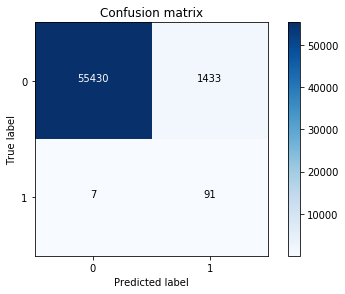

In [50]:
cnf_matrix = confusion_matrix(Y_test,smote_model.predict(X_test))
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')

## Summary:

  * We achieved the best model using SMOTE technique. Both Accuracy and recall is very high in SMOTE technique
  * Gridsearchcv was implemented to find the best parameters to the model
  

## References

  *  https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets                 
  * https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now                     
  * https://github.com/jgcorliss/credit-card-fraud/blob/master/Credit%20Card%20Fraud%20Detection.ipynb